# Supervised Learning with PyCaret - Classification

### References:
- [PyCaret Doc - Classification](https://pycaret.readthedocs.io/en/latest/api/classification.html)
- [PyCaret Official - Quickstart](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)
- [TowardsDataScience - A Complete Data Analysis Workflow in Python PyCaret](https://towardsdatascience.com/a-complete-data-analysis-workflow-in-python-pycaret-9a13c0fa51d4)

In [1]:
import pycaret as pct
pct.__version__

'2.3.10'

In [2]:
%matplotlib inline
import seaborn
from pycaret.classification import *

## Load Data

In [3]:

data = seaborn.load_dataset('titanic')
data.drop('survived', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 73.7+ KB


In [4]:
train = data.sample(frac=0.95, random_state=42)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

## Setup

In [5]:
clf = setup(
    data=train, 
    target='alive',
    session_id=123
)
   

,Description,Value
0,session_id,123
1,Target,alive
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(846, 14)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare Models

In [6]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8362,0.8437,0.6907,0.8515,0.7589,0.6381,0.6488,0.0330
lda,Linear Discriminant Analysis,0.8327,0.8639,0.7528,0.7990,0.7736,0.6413,0.6436,0.0060
ridge,Ridge Classifier,0.8310,0.0000,0.7528,0.7948,0.7715,0.6379,0.6401,0.0070
lr,Logistic Regression,0.8226,0.8676,0.7439,0.7834,0.7607,0.6203,0.6232,0.8750
lightgbm,Light Gradient Boosting Machine,0.8158,0.8595,0.7125,0.7857,0.7447,0.6017,0.6056,0.0200
rf,Random Forest Classifier,0.8058,0.8548,0.7085,0.7701,0.7360,0.5830,0.5859,0.0980
ada,Ada Boost Classifier,0.8057,0.8454,0.7439,0.7481,0.7448,0.5882,0.5894,0.0310
et,Extra Trees Classifier,0.7805,0.8229,0.6905,0.7308,0.7059,0.5314,0.5357,0.0810
dt,Decision Tree Classifier,0.7634,0.7509,0.7083,0.6902,0.6975,0.5036,0.5052,0.0050
svm,SVM - Linear Kernel,0.7128,0.0000,0.5326,0.6535,0.5628,0.3638,0.3812,0.0080


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predictions
This function predicts the Label and the Score (probability of predicted class) columns using a trained model. When data is None, it predicts label and score on the test set (created during the setup function).

In [17]:

predictions_validation = predict_model(best)
predictions_validation.groupby(['alive','Label'])['Score'].count()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7795,0.8194,0.5810,0.8356,0.6854,0.5240,0.5445


alive  Label
no     no       137
       yes       12
yes    no        44
       yes       61
Name: Score, dtype: int64

In [9]:

predictions = predict_model(best, data=test)
predictions.groupby(['alive','Label'])['Score'].count()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.9412,0,0,0,0,0


alive  Label
no     no       33
       yes       1
yes    no        3
       yes       8
Name: Score, dtype: int64

### Hyperparameters tuning

In [10]:
best_tuned = tune_model(best, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.8813,0.7391,1.0000,0.8500,0.7775,0.7975
1,0.8500,0.8919,0.6522,0.9375,0.7692,0.6633,0.6873
2,0.8305,0.8391,0.6364,0.8750,0.7368,0.6164,0.6334
3,0.8136,0.8636,0.6364,0.8235,0.7179,0.5821,0.5929
4,0.8475,0.8857,0.6364,0.9333,0.7568,0.6513,0.6767
5,0.9492,0.9373,0.9091,0.9524,0.9302,0.8903,0.8909
6,0.8644,0.8732,0.7391,0.8947,0.8095,0.7057,0.7135
7,0.7797,0.8877,0.6087,0.7778,0.6829,0.5179,0.5271
8,0.7797,0.7029,0.5217,0.8571,0.6486,0.5016,0.5344


In [11]:
predictions = predict_model(best_tuned, data=test)
predictions.groupby(['alive','Label'])['Score'].count()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.9572,0,0,0,0,0


alive  Label
no     no       34
yes    no        4
       yes       7
Name: Score, dtype: int64

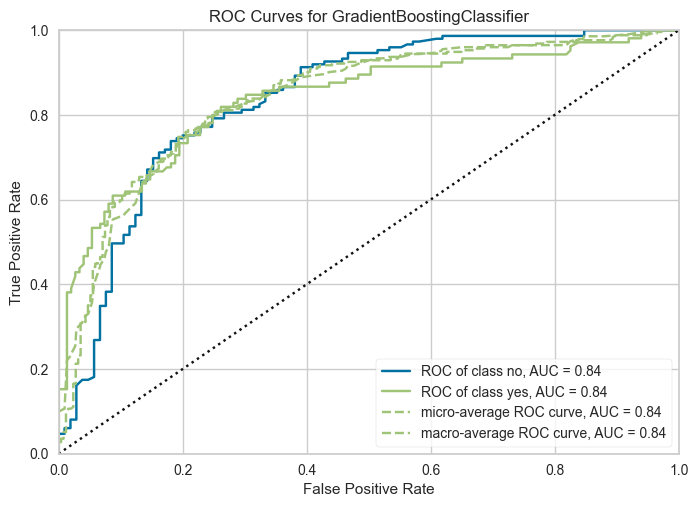

In [12]:
plot_model(best_tuned)

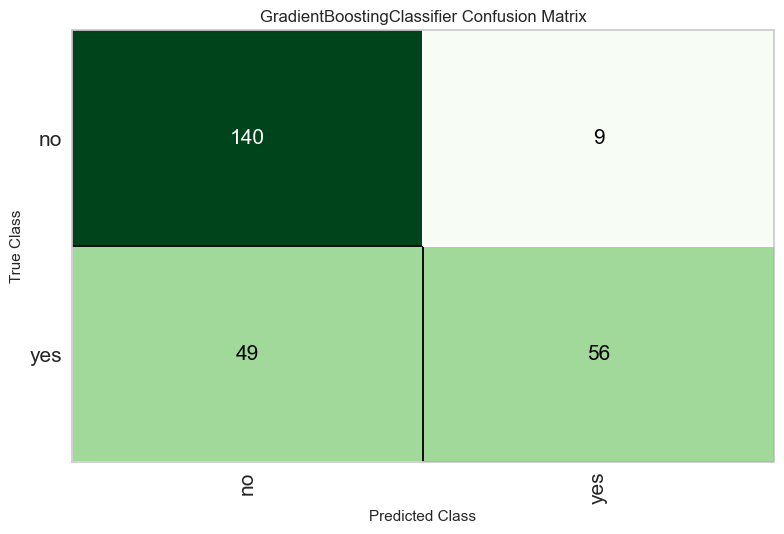

In [13]:

plot_model(best_tuned, plot = 'confusion_matrix')

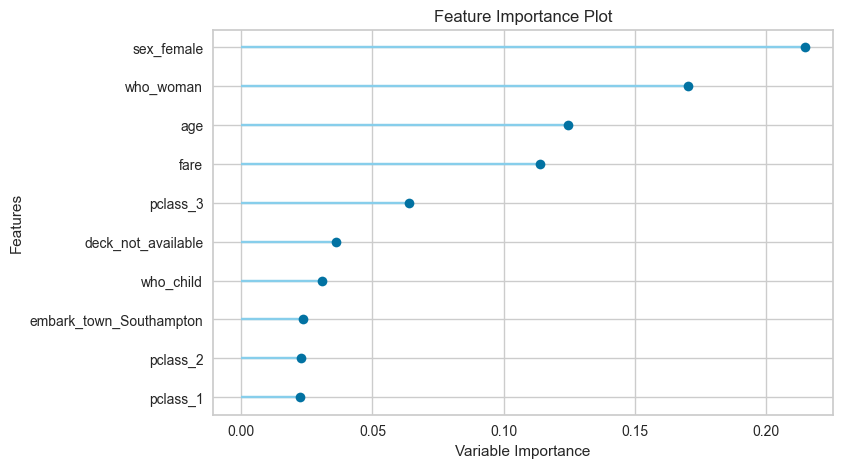

In [14]:
plot_model(best_tuned, plot='feature')

In [15]:
evaluate_model(best_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
# Interpret the model using SHAP values
interpret_model(best_tuned)

TypeError: This function only supports tree based models for binary classification: lightgbm, dt, rf, et.

In [ ]:
# Finalize the model
finalize_model(best_tuned)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
# Save the model
str_today = 'today'
save_model(best_tuned, f'best_tuned_{str_today}')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='alive',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
                                             mi